<a href="https://colab.research.google.com/github/IngerMasha/week9/blob/main/day2_Exercises_XP_Ninja.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exercise 1 : Multi-Dimensional Analysis Of Wine Characteristics

In [1]:
import pandas as pd

wine_data = pd.read_csv('wine.csv')
print("Dataset info:")
print(wine_data.info())
print("\nFirst rows of the dataset:")
print(wine_data.head())

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2247 entries, 0 to 2246
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   name                     2247 non-null   object 
 1   price (PLN)              2247 non-null   float64
 2   country                  2239 non-null   object 
 3   region                   2079 non-null   object 
 4   appellation              1631 non-null   object 
 5   vineyard                 1228 non-null   object 
 6   vintage                  1974 non-null   float64
 7   volume (liters)          2179 non-null   float64
 8   alcohol (%)              1723 non-null   float64
 9   serving temperature (C)  1777 non-null   object 
 10  color                    1997 non-null   object 
 11  kind                     254 non-null    object 
 12  taste                    2195 non-null   object 
 13  style                    1808 non-null   object 
 14  medals    

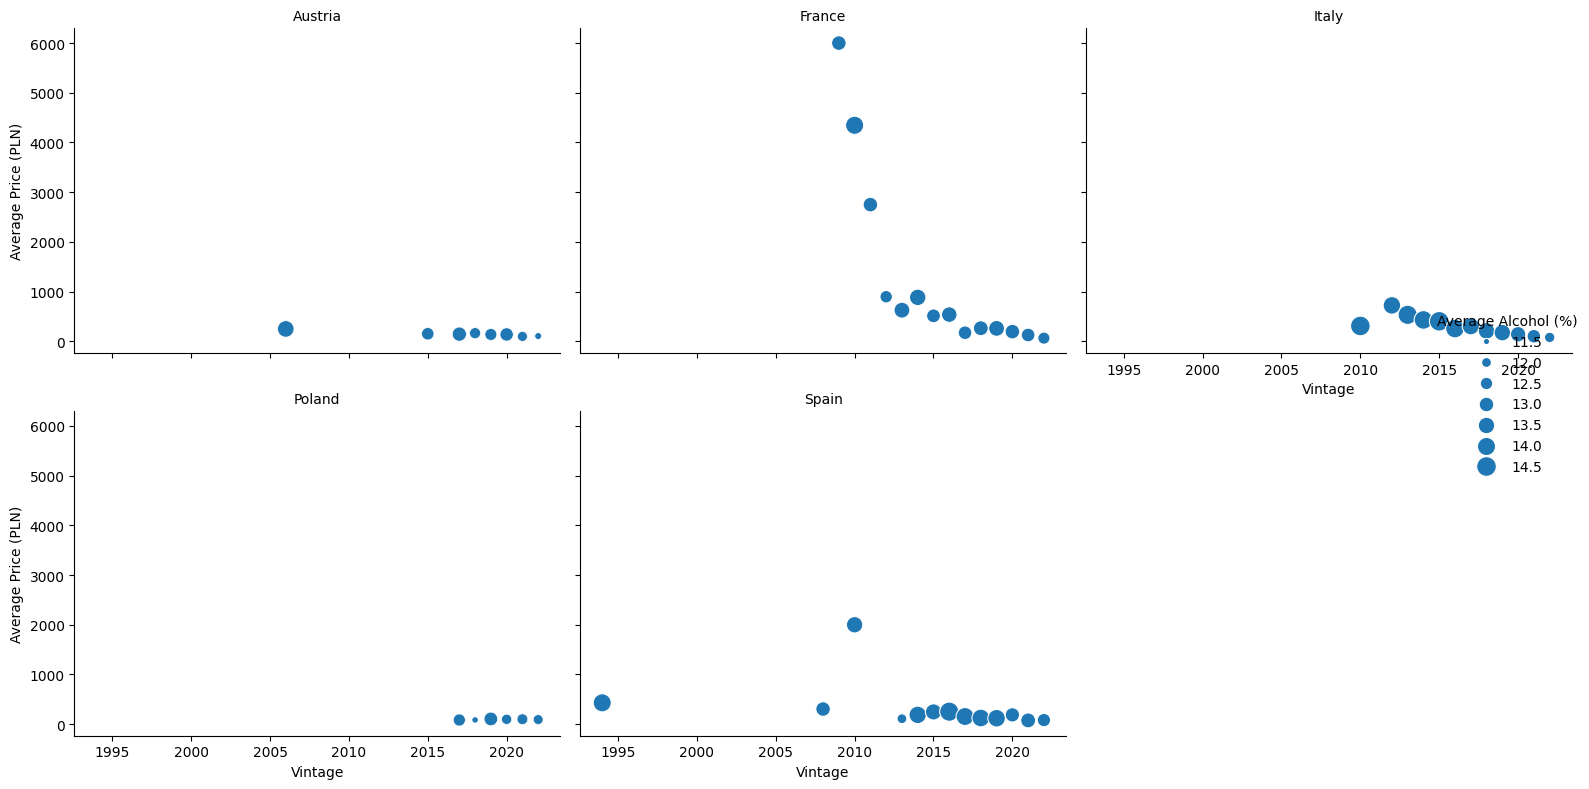

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

top_countries = wine_data['country'].value_counts().nlargest(5).index
filtered_df = wine_data[wine_data['country'].isin(top_countries)]

grouped_df = filtered_df.groupby(['country', 'vintage']).agg({
    'price (PLN)': 'mean',
    'alcohol (%)': 'mean'
}).reset_index()

g = sns.FacetGrid(grouped_df, col='country', col_wrap=3, height=4, aspect=1.2)
g.map(sns.scatterplot, 'vintage', 'price (PLN)', size=grouped_df['alcohol (%)'], sizes=(20, 200))
g.set_axis_labels('Vintage', 'Average Price (PLN)')
g.set_titles(col_template="{col_name}")
g.add_legend(title='Average Alcohol (%)')
plt.tight_layout()
plt.show()
